In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_test.shape

(418, 11)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
for col in df.columns:
    print(df[col].value_counts())
    print()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

O'Connell, Mr. Patrick D         1
Kent, Mr. Edward Austin          1
Kilgannon, Mr. Thomas J          1
Adams, Mr. John                  1
Skoog, Miss. Margit Elizabeth    1
                                ..
Taylor, Mr. Elmer Zebley         1
Harrison, Mr. William            1
Shutes, Miss. Elizabeth W        1
Betros, Mr. Tannous              1
Leader, Dr. Alice (Farnham)      1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

0    678
1    11

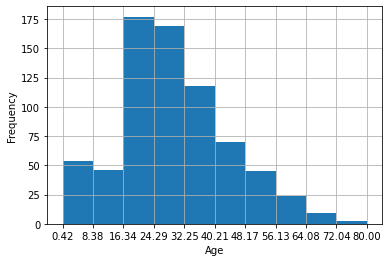

In [9]:
count, bin_edges = np.histogram(df[df["Age"].notnull()]["Age"])
df["Age"].plot(kind='hist', xticks=bin_edges, grid = True)
plt.xlabel("Age")
plt.show()

In [10]:
print(df["Age"].mean())
print(df["Age"].median())

29.69911764705882
28.0


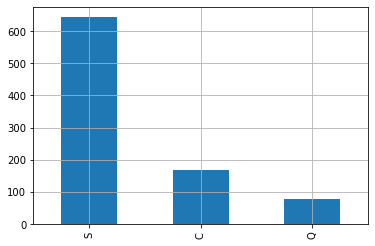

In [11]:
df["Embarked"].value_counts().plot(kind = 'bar', grid=True)

In [12]:
df['Age'].fillna(28, inplace=True)
df['Embarked'].fillna('S', inplace=True)
df.drop(columns=["Cabin", "PassengerId", "Name", "Ticket"], inplace=True)

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["Embarked"] = le.fit_transform(df["Embarked"])

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [16]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

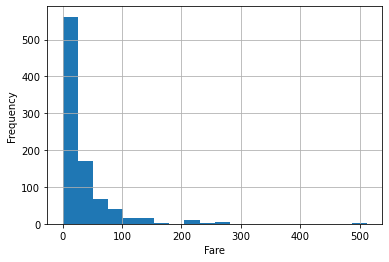

In [17]:
df["Fare"].plot(kind = "hist", grid=True, bins = 20)
plt.xlabel("Fare")
plt.show()

In [18]:
print(df_test["Fare"].mean())
print(df_test["Fare"].median())
print(df["Fare"].mean())
print(df["Fare"].median())

35.6271884892086
14.4542
32.2042079685746
14.4542


In [19]:
print(df_test["Age"].mean())
print(df_test["Age"].median())
print(df["Age"].median())

30.272590361445783
27.0
28.0


In [20]:
df_test["Age"].fillna(28, inplace = True)
df_test["Fare"].fillna(df["Fare"].median(), inplace=True)
df_test.drop(columns = ["Name", "PassengerId", "Cabin", "Ticket"], inplace=True)
df_test["Sex"] = le.fit_transform(df_test["Sex"])
df_test["Embarked"] = le.fit_transform(df_test["Embarked"])

In [21]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [22]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


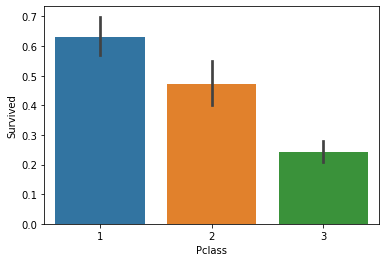

In [23]:
sns.barplot(data = df, x = "Pclass", y = "Survived")

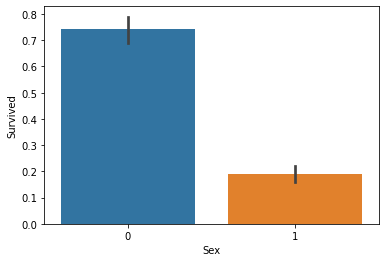

In [24]:
sns.barplot(data = df, x = "Sex", y = "Survived")

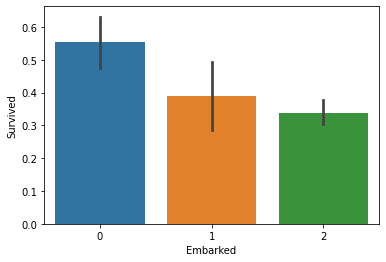

In [25]:
sns.barplot(data = df, x = "Embarked", y = "Survived")

In [26]:
#plt.figure(figsize=(14,8))
#sns.barplot(x = df["Age"], y = df["Survived"])

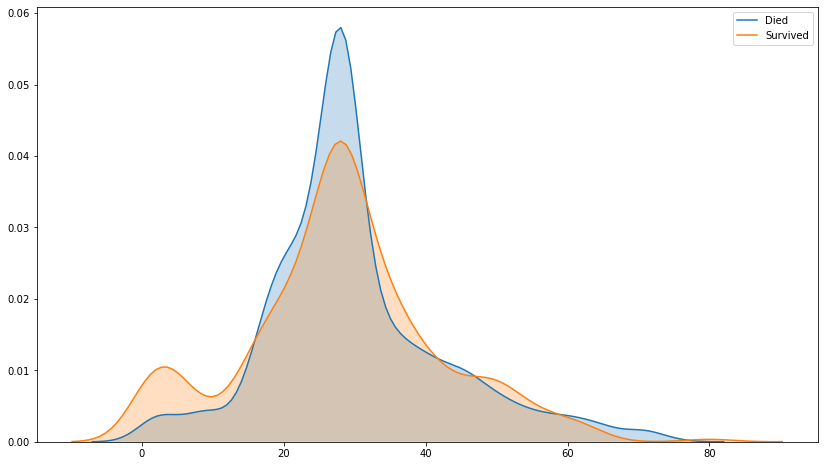

In [27]:
plt.figure(figsize=(14,8))
ax = sns.kdeplot(data = df[df["Survived"]==0]["Age"], shade=True)
sns.kdeplot(data = df[df["Survived"]==1]["Age"], shade=True, ax=ax)
plt.legend(["Died", "Survived"])

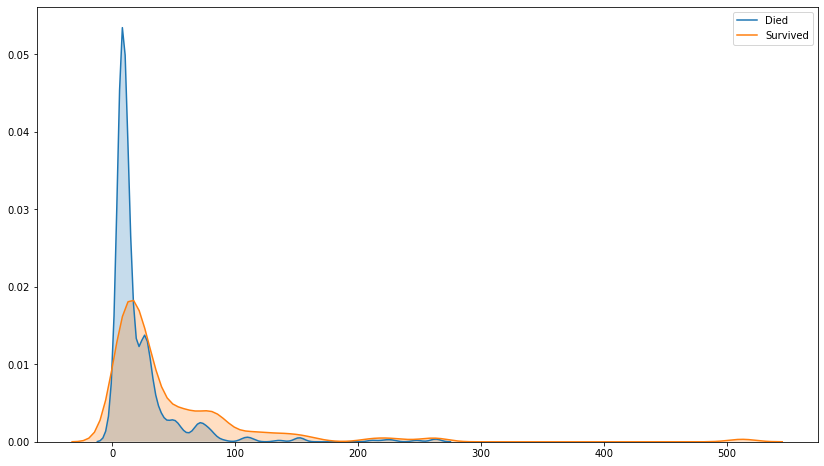

In [28]:
plt.figure(figsize=(14,8))
ax = sns.kdeplot(data = df[df["Survived"]==0]["Fare"], shade=True)
sns.kdeplot(data = df[df["Survived"]==1]["Fare"], shade=True, ax=ax)
plt.legend(["Died", "Survived"])

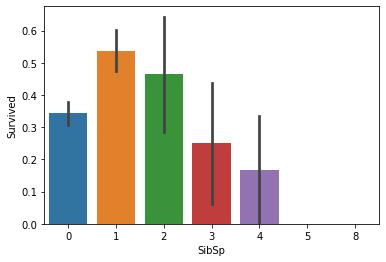

In [29]:
sns.barplot(x = df["SibSp"], y = df["Survived"])

In [30]:
print("Total with 5 SibSp = ", df[df["SibSp"] == 5].shape[0], "and survived = ", df[(df["SibSp"] == 5) & (df["Survived"] == 1)].shape[0])
print("Total with 8 SibSp = ", df[df["SibSp"] == 8].shape[0], "and survived = ", df[(df["SibSp"] == 8) & (df["Survived"] == 1)].shape[0])

Total with 5 SibSp =  5 and survived =  0
Total with 8 SibSp =  7 and survived =  0


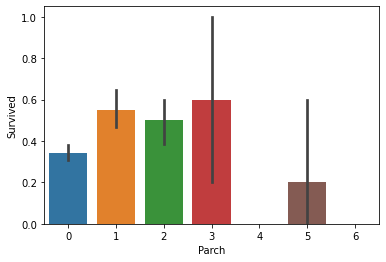

In [31]:
sns.barplot(x = df["Parch"], y = df["Survived"])

In [32]:
print("Total with 4 Parch = ", df[df["Parch"] == 4].shape[0], "and survived = ", df[(df["Parch"] == 4) & (df["Survived"] == 1)].shape[0])
print("Total with 6 Parch = ", df[df["Parch"] == 6].shape[0], "and survived = ", df[(df["Parch"] == 6) & (df["Survived"] == 1)].shape[0])

Total with 4 Parch =  4 and survived =  0
Total with 6 Parch =  1 and survived =  0


In [33]:
X = df[["Pclass", "Sex", "Age", "SibSp", "Parch","Fare","Embarked"]]
y = df["Survived"]

In [36]:
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [37]:
y_hat = dt.predict(df_test)

In [38]:
y_hat

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
submission = pd.read_csv("test.csv")
submission = submission[["PassengerId"]]
submission["Survived"] = y_hat
submission.to_csv("Submission.csv", index=False)